## Problem Statment

Using the dataset of all the accidents that occurred in 2019 in the UK which contain their variable of interest.
Develope a machine learning Model to predict in details  the severity accidents
(that is, whether an accident is “fatal”, “serious” or “slight” – 3 classes in total), from all the 
other features in the dataset.

This task is to answer questions related to a scenario where the UK emergency services are looking into developing a system to predict the severity of road accidents using machine learning techniques. A dataset containing information about accidents that occurred in 2019 in the UK was provided, and the aim was to categorize the accidents as "fatal," "serious," or "slight" based on various variables. The comparison of traditional machine learning algorithms with neural networks was also requested to determine if the latter offers better performance.

In [ ]:
## Data Exploration

In [283]:
#importing liberaries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import seaborn as sns

In [284]:
#loading data

df = pd.read_csv('OPTION1_uk_road_accident_2019_coursework_final.csv')
df.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2019010225080,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2019200908684,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2019040860897,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2019460847205,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2019051911581,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


In [285]:
#checking the shape of dataset
df.shape

(31647, 14)

In [286]:
#understanding the type of variables of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   accident_index               31647 non-null  object 
 1   speed_limit                  31647 non-null  int64  
 2   light_conditions             31647 non-null  object 
 3   weather_conditions           31647 non-null  object 
 4   road_surface_conditions      31647 non-null  object 
 5   vehicle_type                 31647 non-null  object 
 6   junction_location            31647 non-null  object 
 7   skidding_and_overturning     31647 non-null  object 
 8   vehicle_leaving_carriageway  31647 non-null  object 
 9   hit_object_off_carriageway   31647 non-null  object 
 10  first_point_of_impact        31647 non-null  object 
 11  sex_of_driver                31647 non-null  object 
 12  age_of_oldest_driver         25197 non-null  float64
 13  accident_severit

From the above the dataset is of 14 columns with a toal row of 31647. speed_limit column and age_of_oldest_driver have the data type of int an float respectively while the rest of the columns are of object type

#### Droping unnecessary column

From the columns of our dataset we will drop  accident_index column since it does not contribute to our analysis

In [287]:
df = df.drop(columns= 'accident_index')
df.shape

(31647, 13)

In [288]:
# checking for missing values
df.isna().sum()

speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64

From the above the age_of_oldest_driver and accident_severity columns both have missing values of 6450 and 1172

In [289]:
#droping missing values
df = df.dropna()
df.isna().sum()

speed_limit                    0
light_conditions               0
weather_conditions             0
road_surface_conditions        0
vehicle_type                   0
junction_location              0
skidding_and_overturning       0
vehicle_leaving_carriageway    0
hit_object_off_carriageway     0
first_point_of_impact          0
sex_of_driver                  0
age_of_oldest_driver           0
accident_severity              0
dtype: int64

In [290]:
#dropping rows with the string "data missing or out of range"
df = df.drop(df[df.eq('data missing or out of range').any(1)].index)
df.head()

,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
4,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
6,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,40.0,fatal
7,50,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,57.0,slight


In [291]:
#Taking the statistics summary of our dataset
df.describe()

,speed_limit,age_of_oldest_driver
count,22847.000000,22847.000000
mean,38.176828,47.458966
std,14.374650,16.877233
min,-1.000000,6.000000
25%,30.000000,34.000000
50%,30.000000,47.000000
75%,50.000000,59.000000
max,70.000000,101.000000


The table above give us a summary of the data, including the mean and standard deviation of numerical features

In [292]:
# investigating the dependent variable
df['accident_severity'].unique()

array(['serious', 'fatal', 'slight', 'Serious', 'Slight', 'Fatal'],
      dtype=object)

In [293]:
#Fixing anomalies in the target variable
df['accident_severity']=df['accident_severity'].str.lower()

#### Checking for the distribution of the target variable with an horizontal bar chat

Text(0.5, 1.0, 'Distribution of Target Labels')

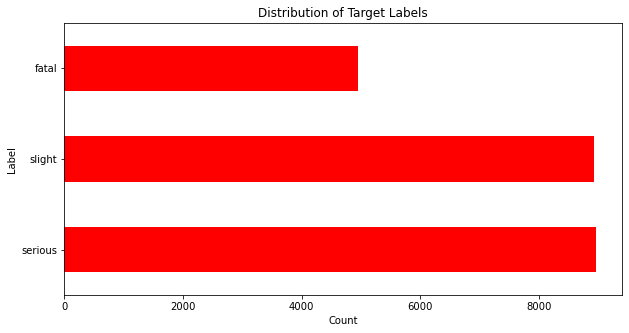

In [294]:
#counting the target variable
label_counts =df['accident_severity'].value_counts()

# plot a bar chart of the label counts
label_counts.plot(kind='barh', figsize=(10, 5), color='red')

# set the labels and title
plot.xlabel('Count')
plot.ylabel('Label')
plot.title('Distribution of Target Labels')

The above bar chart gives a visual representation of the distribution of the target labels in the dataset. It shows that the majority of accidents in the dataset were classified as "slight", followed by "serious" and "fatal". 

## Data preprocessing

splitting our dataset to dependent and independent variable

In [295]:
#independent variable
x_col = ['speed_limit', 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'vehicle_type', 'junction_location',
       'skidding_and_overturning', 'vehicle_leaving_carriageway',
       'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver',
       'age_of_oldest_driver']
x = df[x_col]
#dependent variable
y_col = 'accident_severity'
y = df[y_col]

In [296]:
#getting the number of unique values in each column
df.nunique()

speed_limit                     7
light_conditions                2
weather_conditions              3
road_surface_conditions         4
vehicle_type                    5
junction_location               2
skidding_and_overturning        2
vehicle_leaving_carriageway     2
hit_object_off_carriageway      2
first_point_of_impact           3
sex_of_driver                   3
age_of_oldest_driver           92
accident_severity               3
dtype: int64

### Label encoding and Hot encoding

In [297]:
#importing libary

from sklearn.preprocessing import LabelEncoder

In [298]:
#label encoding columns
lbc= ['light_conditions', 'skidding_and_overturning', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway','junction_location']


In [299]:
#hot encoding encoding columns
ohc= ['weather_conditions', 'sex_of_driver','vehicle_type','road_surface_conditions','first_point_of_impact' ]

#### label encoding

In [300]:
labelencoder = LabelEncoder()
#label encoding independent variable
x.loc[:,lbc] = x.loc[:,lbc].apply(labelencoder.fit_transform)


C:\Users\hp\AppData\Local\Temp\ipykernel_8752\1229744796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,lbc] = x.loc[:,lbc].apply(labelencoder.fit_transform)


#### one-hot encoding

In [301]:
x= pd.get_dummies(x, columns=ohc, drop_first=True)
x

,speed_limit,light_conditions,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,age_of_oldest_driver,weather_conditions_fog or mist,weather_conditions_other,sex_of_driver_all males,sex_of_driver_male and female,vehicle_type_at least one van,vehicle_type_biped and van,vehicle_type_only cars,vehicle_type_other,road_surface_conditions_flood over 3cm. deep,road_surface_conditions_other,road_surface_conditions_wet or damp,first_point_of_impact_no impact,first_point_of_impact_other points of impact
0,30,0,0,1,1,1,63.0,0,1,1,0,1,0,0,0,0,0,1,0,1
1,30,0,0,1,0,0,82.0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,30,1,1,1,1,1,39.0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,30,0,1,1,1,1,40.0,0,0,1,0,0,0,1,0,0,0,1,0,0
7,50,1,0,1,1,1,57.0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,40,0,0,0,1,1,82.0,0,0,0,1,0,0,1,0,0,0,0,0,0
31642,30,0,1,1,1,1,27.0,0,0,1,0,0,0,0,0,0,0,1,0,0
31643,60,1,0,0,1,1,27.0,0,0,1,0,0,0,0,1,0,0,0,0,1
31644,70,1,1,1,1,1,67.0,0,0,1,0,1,0,0,0,0,0,0,0,0


### Feature Scaling

Since our dataset are not set to a specific range we have to perform a feature scalling to make all values be at a specific range

In [302]:
#loading the StandardScaler module
from sklearn.preprocessing import StandardScaler

In [303]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [304]:
x.shape


(22847, 20)

#### Dimensional reduction
Since the dataset is of sparse matrix type and to reduce the dimension of this dataset we will employ TruncatedSVD which is a popular technique for sparse data

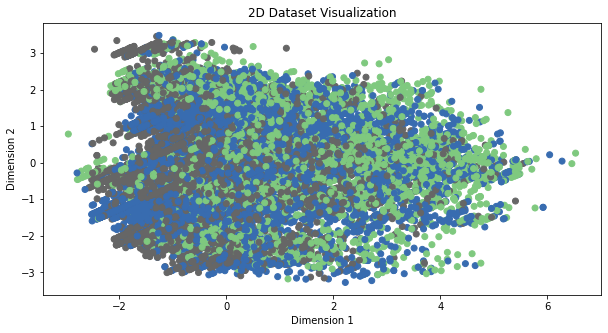

In [305]:
#importing TruncatedSVD module
from sklearn.decomposition import PCA

#setting dimension to 2
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plot.figure(figsize=(10, 5))
labels =y.astype('category')
plot.scatter(x_pca[:,0], x_pca[:,1], c=labels.cat.codes, cmap='Accent',)
plot.xlabel('Dimension 1')
plot.ylabel('Dimension 2')

plot.title('2D Dataset Visualization')
plot.show()

The above pca plot gives us an overview of the accidents severity

### Spliting and traning dataset

In [306]:
#loading module
from sklearn.model_selection import train_test_split

In [307]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 40)

### Classification: using traditional machine learning

Since we are trying to predict the severity of of an accident we use a classification funtion called **Decision Tree Classifier**

#### Decision tree Model

In [308]:
#importing modules
from sklearn.tree import DecisionTreeClassifier

In [309]:
#creating a decisiontree classifier object object
dt = DecisionTreeClassifier(criterion='entropy', splitter='best',max_features=None, min_samples_leaf=1)
#fitting our model
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

#### Evaluating the Decison Tree Model 

#### Predicting the dataset

In [310]:
#importing modules
from sklearn.metrics import confusion_matrix, accuracy_score

In [311]:
#making prediction using our test data
prediction = dt.predict(x_test)
prediction

array(['serious', 'fatal', 'slight', ..., 'fatal', 'slight', 'serious'],
      dtype=object)

In [312]:
#Evaluating Accuracy
accuracy = accuracy_score(y_test,prediction)
print(f"Model accuracy is: {accuracy}")

Model accuracy is: 0.687746170678337


We've got a model accuracy of **69%**

#### improving model

finetunning hyperparameters

In [313]:
#creating a decisiontree classifier object object
dt = DecisionTreeClassifier(criterion='entropy', splitter='best',max_features=5, min_samples_leaf=5)
#fitting our model
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features=5, min_samples_leaf=5)

In [314]:
#importing modules
from sklearn.metrics import confusion_matrix, accuracy_score

In [315]:
#making prediction using our test data
prediction = dt.predict(x_test)
prediction

array(['serious', 'fatal', 'slight', ..., 'serious', 'slight', 'serious'],
      dtype=object)

In [316]:
#Evaluating Accuracy
accuracy = accuracy_score(y_test,prediction)
print(f"Model accuracy is: {accuracy}")

Model accuracy is: 0.7396061269146609


We've got a model accuracy of **76%**

### Evaluating model using confusion_matrix

In [317]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, prediction)
cm

array([[ 646,  148,  126],
       [ 227, 1322,  268],
       [ 201,  220, 1412]], dtype=int64)

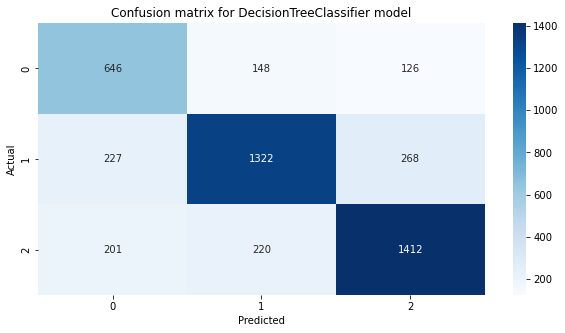

In [318]:
#plotig the matrix using heatmap
plot.figure(figsize=(10, 5))


sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plot.xlabel('Predicted')
plot.ylabel('Actual')
plot.title('Confusion matrix for DecisionTreeClassifier model')

plot.show()

From the above, we can see that DecisionTreeClassifier model correctly predicted the following number of instances for each  the confusion matrix summarizes the number of correct and incorrect predictions made by the model for each class of accident severity (i.e., "fatal", "serious", "slight").

The confusion matrix is a 3x3 matrix, where the rows represent the actual classes of accident severity and the columns represent the predicted classes.

The values in the diagonal of the matrix represent the number of correct predictions for each class. For example, the value 646 in the first row and first column represents the number of "fatal" accidents that were correctly predicted as "fatal".

The values outside the diagonal represent the number of incorrect predictions. For example, the value 148 in the first row and second column represents the number of "fatal" accidents that were incorrectly predicted as "serious".insa

In [319]:
#Report

print(f'Classification Report:\n\n  {classification_report(y_test, prediction)}')

Classification Report:

                precision    recall  f1-score   support

       fatal       0.60      0.70      0.65       920
     serious       0.78      0.73      0.75      1817
      slight       0.78      0.77      0.78      1833

    accuracy                           0.74      4570
   macro avg       0.72      0.73      0.73      4570
weighted avg       0.75      0.74      0.74      4570



### Classification using neural networks Model

In [320]:
#importing neccessary modules
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import sparse_categorical_crossentropy

In [321]:
x_train.shape

(18277, 20)

In [355]:
#hot encoding dependent variable
y_train2 = pd.get_dummies(y_train)
y_test2 = pd.get_dummies(y_test)



###### Adding Layers/neurons

In [356]:
#creating the classifier object
classifier = Sequential()

In [357]:
classifier.add(Dense(64, activation = 'relu', input_dim=20))

In [358]:
#Adding hidden layer
classifier.add(Dense(32, activation = 'relu'))

In [359]:
# adding output layer
classifier.add(Dense(3, activation = 'softmax'))
# note: we use 3 units because our predicion is of 3 classifiers

In [360]:
#compiling our NN model

classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#note: we use the metrics funtion to measure our model accuracy

In [361]:
#fiting dataset with the  NN model

history = classifier.fit(x_train, y_train2, epochs=10, verbose=False, validation_data=(x_test, y_test2), batch_size=10)

#### Evaluating the Neural Network Model accuracy

In [362]:
loss, accuracy = classifier.evaluate(x_train, y_train2, verbose=False)

In [363]:
#Evaluating Accuracy
print(f"Neural Model Accuracy: {accuracy}")

Neural Model Accuracy: 0.7779723405838013


We've got **78% accuracy**

In [364]:
prediction2 = classifier.predict(x_test)
prediction2

143/143 [==============================] - 0s 1ms/step


array([[0.03243514, 0.8854178 , 0.08214711],
       [0.62219465, 0.23234119, 0.1454642 ],
       [0.00104966, 0.22282104, 0.7761293 ],
       ...,
       [0.61629605, 0.26055032, 0.1231536 ],
       [0.07256269, 0.11874429, 0.808693  ],
       [0.3441962 , 0.5027525 , 0.15305127]], dtype=float32)

In [365]:
classifier.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                1344      
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 3)                 99        
                                                                 
Total params: 3,523
Trainable params: 3,523
Non-trainable params: 0
_________________________________________________________________


### Visualizing the loss and accuracy for the training data based on the History callback

In [372]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuarcy')
    plt.title('Training accuracy')
    plot.ylabel('accuracy')
    plot.xlabel('epoch')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'r', label='Training loss')
    plt.title('Training loss')

    plt.legend()

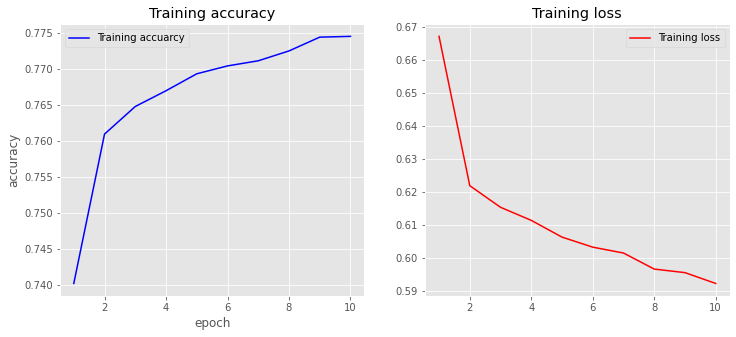

In [373]:
plot_history(history)

### Recomendation

- Base on the evaluations of our models, the **Neural network model** with an **accuracy of 75%** on the test dataset performs better and thus is the best model for this task.

- The final model is good enough to be used in practice as it has a good accuracy of 75% which is better compared to the first model.

- For future improvements i suggest trying other models such as Random forest, and tunning of the hyperprameters